<a href="https://colab.research.google.com/github/Fuadys/artikel-data-sains/blob/main/analisis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('/content/drive/MyDrive/Artikel Data Sains/food_delivery_datasets.csv')

In [45]:
df #menlihat data keseluruhan

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587
...,...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


# Proses Data

In [46]:
df['cust_id']=df['cust_id'].map(str)

In [47]:
df=df[df.rating==5.0]
df.reset_index(drop=True)

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
3,FOOD-10004,0,2018-07-01T14:24:06.719768,2344,138800,466885,5.0,10000,225641128,Completed,0.341921
4,FOOD-10953,0,2018-09-22T13:37:33.712943,1449,58700,463180,5.0,4000,742550960,Completed,0.232322
...,...,...,...,...,...,...,...,...,...,...,...
569,FOOD-10430,0,2018-08-11T15:44:19.426175,1655,80600,366721,5.0,4000,742538793,Completed,0.345022
570,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
571,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
572,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


In [ ]:
df['rating_order']=1

In [51]:
df=pd.concat([df['cust_id'],df['rating'],df['rating_order']], axis=1)
df.columns=['cust_id','rating','rating_order']
df.head()

,cust_id,rating,rating_order
0,1089034,5.0,1
1,180146,5.0,1
3,511038,5.0,1
5,466885,5.0,1
6,463180,5.0,1


In [52]:
df=df.groupby(['cust_id'])
df1=df[['rating_order']].sum()
df1.reset_index()

,cust_id,rating_order
0,1008214,2
1,1010922,3
2,1011942,3
3,1012995,3
4,103236,4
...,...,...
113,929284,8
114,940042,1
115,943758,1
116,949010,3


In [53]:
df_final=df1.sort_values(by='rating_order',ascending=False)
df_final.reset_index()

,cust_id,rating_order
0,366721,25
1,316834,24
2,1094787,23
3,697545,19
4,1472725,17
...,...,...
113,361927,1
114,614144,1
115,594262,1
116,472361,1


# VISUALISASI

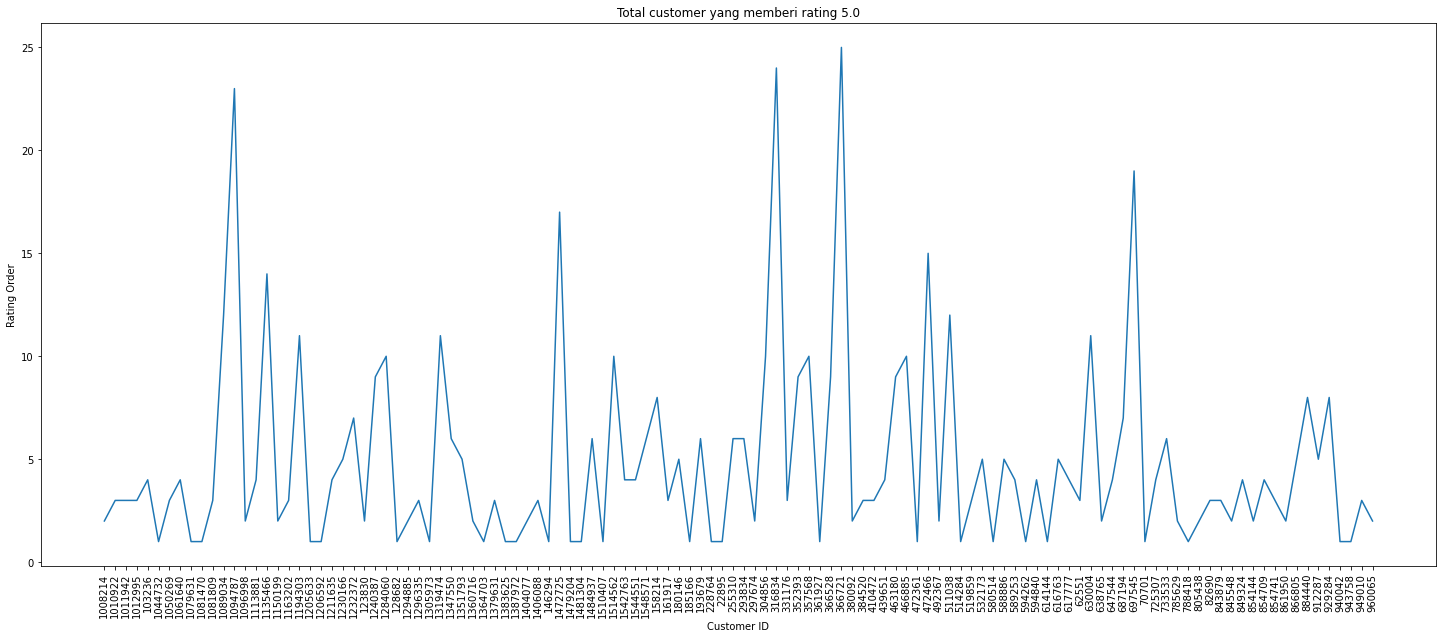

In [54]:
plt.figure(figsize=(25,10))
plt.plot(df1)

plt.title('Total customer yang memberi rating 5.0')
plt.xlabel('Customer ID')
plt.xticks(rotation=90)
plt.ylabel('Rating Order')

plt.show()